<a href="https://colab.research.google.com/github/mayurdalvi5/Customer_Segmentation_using_K-Means_Clustering/blob/main/Customer_Segmentation_using_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
 

Data collection and analysis 

In [ ]:
#loading the data from csv file to a  Pandas Dataframe
customer_data = pd.read_csv('/Datasets/Mall_Customers.csv')

In [ ]:
# firest 5 rows in the dataframe
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#finding the number of rows and columns 
customer_data.shape

(200, 5)

In [ ]:
#getting some information about the dataste
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
#checking for the missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Chossing the annual Income column and Spending Score Column


In [ ]:
# iloc locating specific column , [: Row,Column] selecting 3 and 4th column
X = customer_data.iloc[:,[3,4]].values
print(X)

Choosing the numbers of clusters


WCSS -> Within Cluster sum of squares


In [ ]:
# finding wcss value for different number of clusters

wcss = []

for i in range (1,11):
  kmeans = KMeans(n_clusters= i, init='k-means++', random_state=42)
  kmeans.fit(X)
  
  wcss.append(kmeans.inertia_)

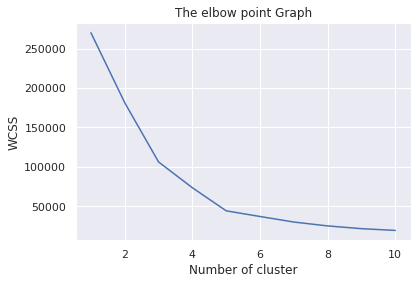

In [ ]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title("The elbow point Graph")
plt.xlabel("Number of cluster")
plt.ylabel("WCSS")
plt.show()

Optimum Number of cluster = 5

Training the K-means CLustering Model

In [ ]:
kmeans = KMeans(n_clusters= 5, init='k-means++', random_state=0)

#retun a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 4 2 0 2 4 2 4 2 0 2 4 2 4 2 4 2 4 2 0 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


Visualizing all the clusters

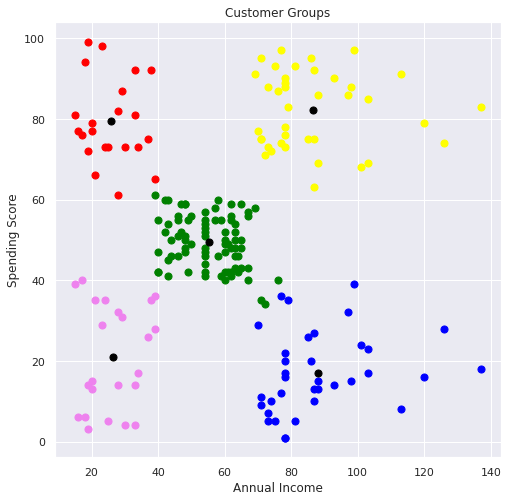

In [ ]:
# plotting all the clusters and Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y ==0,0], X[Y ==0,1], s =50 , c ='green', label = 'Cluster 1')
plt.scatter(X[Y ==1,0], X[Y ==1,1], s =50 , c ='red', label = 'Cluster 2')
plt.scatter(X[Y ==2,0], X[Y ==2,1], s =50 , c ='yellow', label = 'Cluster 3')
plt.scatter(X[Y ==3,0], X[Y ==3,1], s =50 , c ='violet', label = 'Cluster 4')
plt.scatter(X[Y ==4,0], X[Y ==4,1], s =50 , c ='blue', label = 'Cluster 5')

#plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s =50, c ='Black', label='centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()